In [2]:
import pandas as pd
from predictors import shift
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def set_index(dataRaw):
    col_time = dataRaw.columns[0]
    dataRaw[col_time] = pd.to_datetime(dataRaw[col_time])
    dataRaw = dataRaw.set_index(col_time)
    return dataRaw

def fill(dataRaw):
    X = dataRaw.copy()
    X.fillna(method='ffill', inplace=True) 
    X.fillna(method='bfill', inplace=True)
    return X

def outliers(dataRaw, max_std):
    X = dataRaw.copy()
    
    if outliers:
        z_scores = (X-X.mean())/X.std()
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores > max_std)
        X = X.mask(filtered_entries)
    return X

In [4]:
path = "../../TELCO/v0/"
file_name = "TELCO_data_2021_01.zip"
df = pd.read_csv(path+file_name)
df = set_index(df)
df = outliers(df, 5)
df = fill(df)

In [5]:
serie = df["TS12"]

In [6]:
serie_s = shift(serie, 288*7)

<AxesSubplot:xlabel='time'>

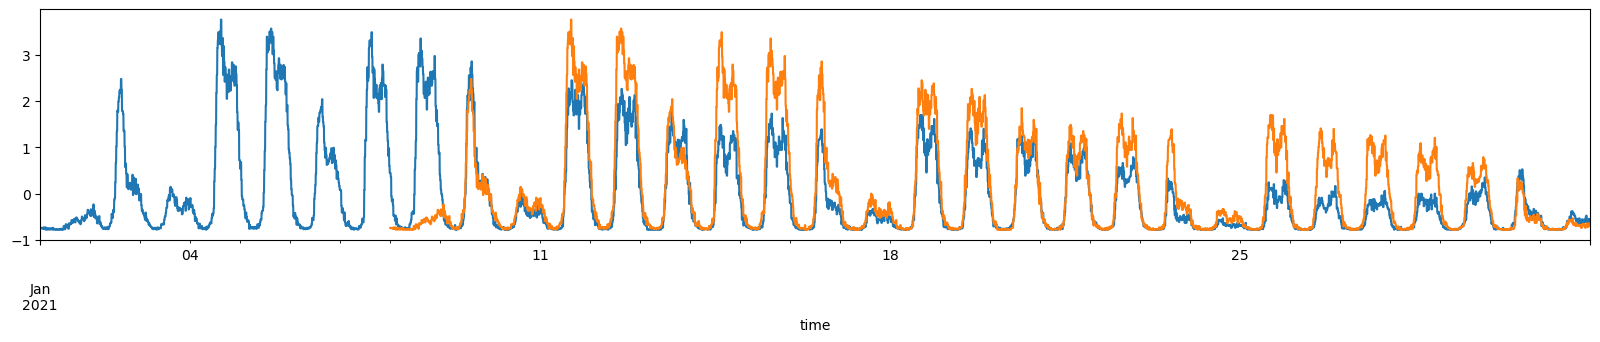

In [7]:
plt.figure(figsize=[20,3])
serie.plot()
serie_s.plot()